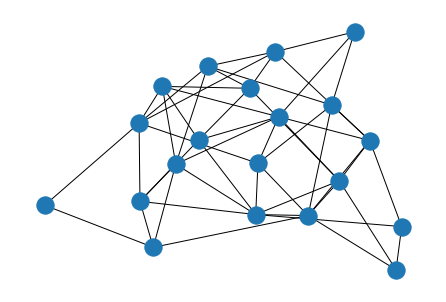

In [2]:
import networkx as nx
G=nx.gnm_random_graph(20,50)
nx.draw(G)

In [3]:
#initial_state function
def initial_state(G):
    state={}
    for node in G.nodes:
        state[node]='asleep'
    return state

In [4]:
initial_state(G)

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

In [6]:
#tarnsition_state function
import random
P_AWAKEN=0.2
def state_transition(G,current_state):
    next_state={}
    for node in G.nodes:
        if current_state[node]=='asleep':
            if random.random()<P_AWAKEN:
                next_state[node]='awake'
    return next_state

In [10]:
test_state=initial_state(G)
state_transition(G,test_state)

{7: 'awake', 10: 'awake', 19: 'awake'}

In [17]:
from simulation import Simulation
sim=Simulation(G,initial_state,state_transition,name='Simple sim')

In [18]:
sim.state()

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

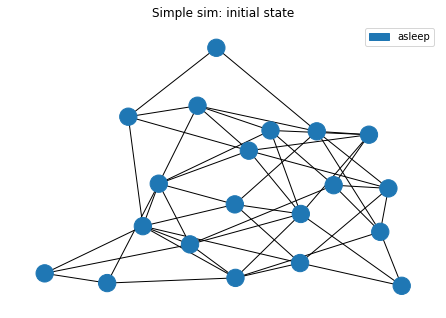

In [19]:
sim.draw()

In [20]:
sim.run()

In [21]:
sim.steps

1

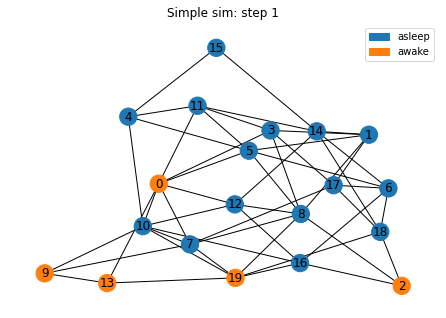

In [22]:
sim.draw(with_labels=True)

In [23]:
sim.state()

{0: 'awake',
 1: 'asleep',
 2: 'awake',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'awake',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'awake',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'awake'}

In [24]:
sim.run(10)

In [25]:
sim.steps

11

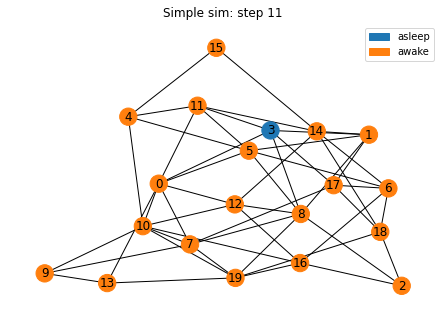

In [27]:
sim.draw(with_labels=True)

<AxesSubplot:title={'center':'Simple sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

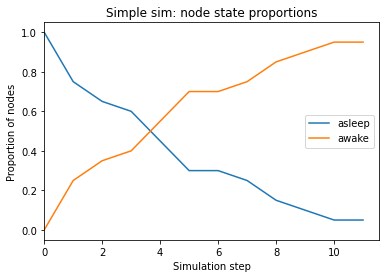

In [28]:
sim.plot()

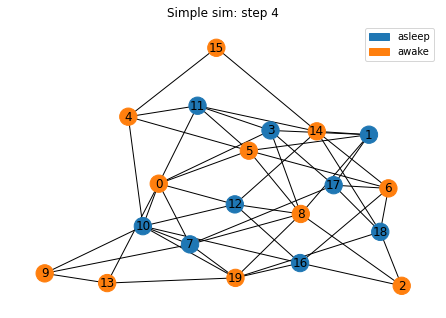

In [29]:
sim.draw(4,with_labels=True)

In [30]:
sim.state(4)

{0: 'awake',
 1: 'asleep',
 2: 'awake',
 3: 'asleep',
 4: 'awake',
 5: 'awake',
 6: 'awake',
 7: 'asleep',
 8: 'awake',
 9: 'awake',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'awake',
 14: 'awake',
 15: 'awake',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'awake'}

<AxesSubplot:title={'center':'Simple sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

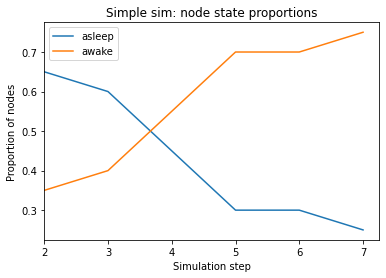

In [31]:
sim.plot(min_step=2,max_step=8)

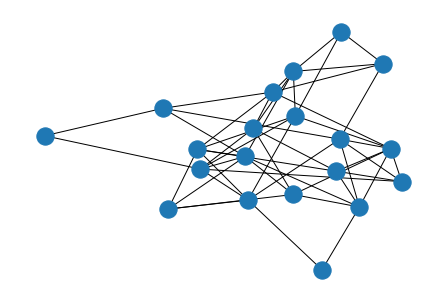

In [32]:
#The voter model
G=nx.gnm_random_graph(20,50)
nx.draw(G)

In [56]:
import string,random
def initial_state(G):
    state={}
    for node in G.nodes:
        state[node]=random.choice('ABCD')
    return state

In [57]:
initial_state(G)

{0: 'D',
 1: 'A',
 2: 'B',
 3: 'D',
 4: 'B',
 5: 'C',
 6: 'C',
 7: 'D',
 8: 'C',
 9: 'A',
 10: 'A',
 11: 'B',
 12: 'D',
 13: 'A',
 14: 'A',
 15: 'C',
 16: 'C',
 17: 'D',
 18: 'D',
 19: 'C'}

In [58]:
def state_transition(G,current_state):
    next_state={}
    for node in G.nodes:
        if G.degree(node)>0:
            neighbor=random.choice(list(G.neighbors(node)))
            next_state[node]=current_state[neighbor]
    return next_state

In [59]:
test_state=initial_state(G)
state_transition(G,test_state)

{0: 'B',
 1: 'C',
 2: 'D',
 3: 'C',
 4: 'A',
 5: 'B',
 6: 'B',
 7: 'B',
 8: 'C',
 9: 'C',
 10: 'D',
 11: 'A',
 12: 'C',
 13: 'C',
 14: 'B',
 15: 'A',
 16: 'D',
 17: 'B',
 18: 'D',
 19: 'D'}

In [60]:
import matplotlib.pyplot as plt
sim=Simulation(G,initial_state,state_transition,name='Voter Model')

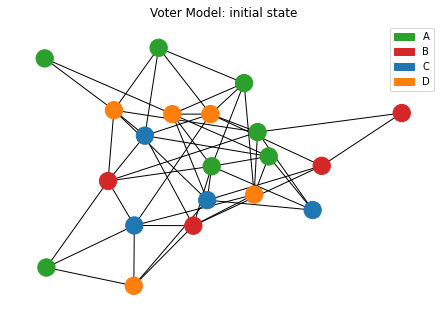

In [61]:
sim.draw(labels='ABCD')

In [62]:
sim.run(40)

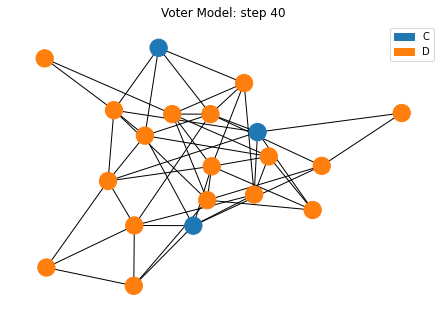

In [63]:
sim.draw()

<AxesSubplot:title={'center':'Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

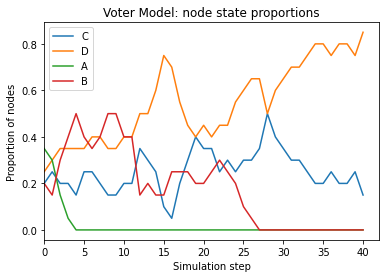

In [64]:
sim.plot()

In [66]:
#Synchronous vs. asynchronous updates

#This is the same as before
def state_transition(G,current_state):
    next_state={}
    for node in G.nodes:
        if G.degree(node)>0:
            neighbor=random.choice(list(G.neighbors(node)))
            next_state[node]=current_state[neighbor]
    return next_state

In [67]:
# This example is potentially biased, don't use it
def state_transition_async(G,curren_state):
    for node in G.nodes:
        if G.degree(node)>0:
            neighbor=random.choice(list(G.neighbors(node)))
            current_state[node]=current_state[neighbor]
    return current_state

In [68]:
def state_transition_async(G,current_state):
    nodes_to_update=list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node)>0:
            neighbor=random.choice(list(G.neighbors(node)))
            current_state[node]=current_state[neighbor]
    return current_state

<AxesSubplot:title={'center':'Async Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

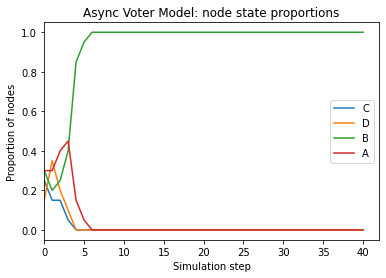

In [74]:
sim=Simulation(G,initial_state,state_transition_async,name='Async Voter Model')
sim.run(40)
sim.plot()

In [75]:
#Stop condition
def stop_condition(G,current_state):
    unique_state_values=set(current_state.values())
    is_stopped=len(unique_state_values)<=1
    return is_stopped

In [99]:
sim=Simulation(G,initial_state,state_transition,stop_condition,name='Voter Model')
sim.run(100)

Stop condition met at step 10.


In [100]:
sim.steps

10

<AxesSubplot:title={'center':'Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

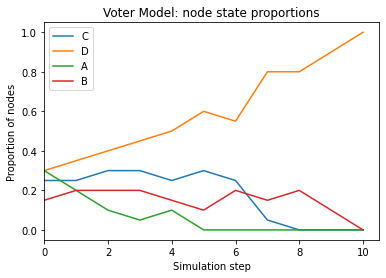

In [101]:
sim.plot()

In [106]:
#Rewiring the graph
def state_transition_async_rewiring(G,current_state):
    nodes_to_update=list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node)>0:
            neighbor=random.choice(list(G.neighbors(node)))
            current_state[node]=current_state[neighbor]
            neighbor=random.choice(list(G.neighbors(node)))
            if current_state[node]!=current_state[neighbor]:
                G.remove_edge(node,neighbor)
    return current_state

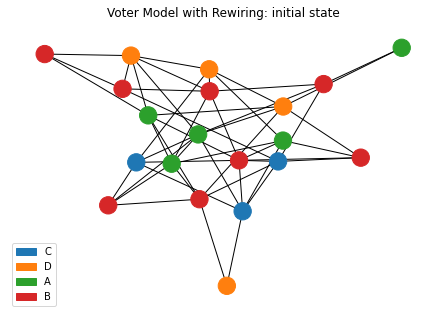

In [111]:
sim=Simulation(G,initial_state,state_transition_async_rewiring,stop_condition,
              name='Voter Model with Rewiring')
sim.draw()

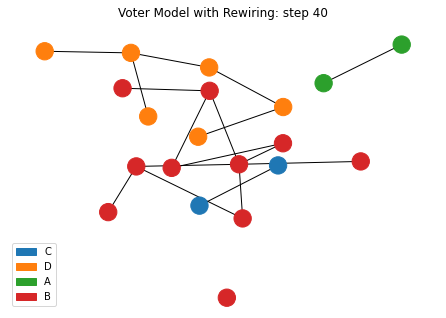

In [112]:
sim.run(40)
sim.draw()

<AxesSubplot:title={'center':'Voter Model with Rewiring: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

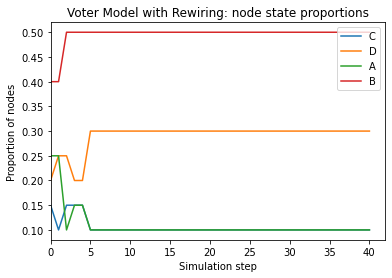

In [113]:
sim.plot()

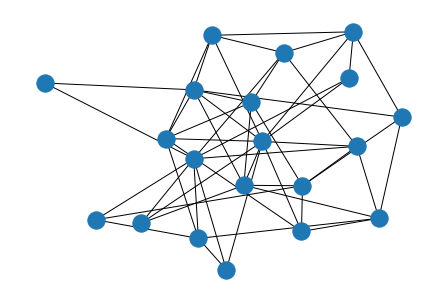

In [114]:
#The SIS model
G=nx.gnm_random_graph(20,50)
nx.draw(G)

In [115]:
def initial_state(G):
    state={}
    for node in G.nodes:
        state[node]='S'
    patient_zero=random.choice(list(G.nodes))
    state[patient_zero]='I'
    return state

In [116]:
initial_state(G)

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'I',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S'}

In [117]:
MU=0.1
BETA=0.1
def state_transition(G,current_state):
    next_state={}
    for node in G.nodes:
        if current_state[node]=='I':
            if random.random()<MU:
                next_state[node]='S'
        else:
            for neighbor in G.neighbors(node):
                if current_state[neighbor]=='I':
                    if random.random()<BETA:
                        next_state[node]='I'
    return next_state

In [118]:
test_state=initial_state(G)
state_transition(G,test_state)

{}

In [121]:
sim=Simulation(G,initial_state,state_transition,name='SIS Model')

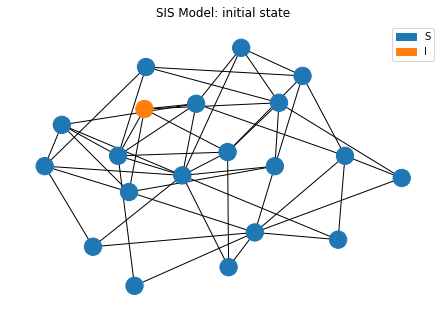

In [122]:
sim.draw()

In [123]:
sim.run(25)

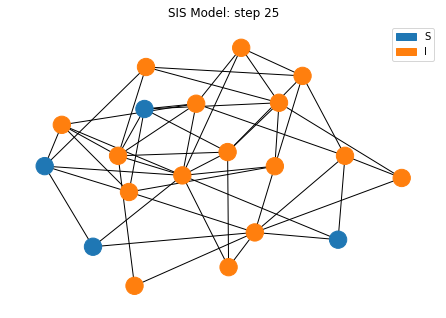

In [124]:
sim.draw()

<AxesSubplot:title={'center':'SIS Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

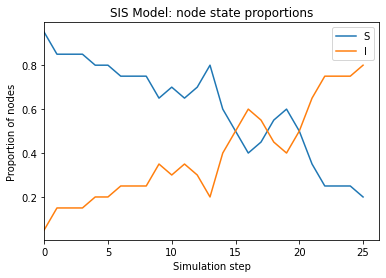

In [125]:
sim.plot()